In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

green_sq = '\U0001F7E9' # unicode for green square
yellow_sq = '\U0001F7E8'
black_sq = '\U00002B1B'

list_of_words = {}
with open("wordlist.txt") as wordlist:
    list_of_words = [line.rstrip() for line in wordlist.readlines()]
    # list_of_words = list_of_words[:10]
randomWord = np.random.choice(list_of_words)


In [3]:
def getWord(argument):
    # single_word = input("Enter a five letter english word")
    single_word = argument
    assert not len(single_word) != 5, "Please provide five letter word"
    if single_word not in list_of_words:
        print("Please only use valid english letter word")
        sys.exit(0)
    return single_word

In the above code, user input is given and list of words is being read from a word list

the following section holds code for comparing string and list to create a encoding of base 3

In [4]:
def generateEncoding(single_string, string_list):
    
    result_list = []
    for i_word in range(len(string_list)):
        result_list.append([])
        current_word = string_list[i_word]
        for char_word in range(len(current_word)):
            result = 0
            for ch in range(len(single_string)):
                if current_word[char_word] == single_string[ch]:
                    result = 1
            result_list[-1].append(result)
    
    for i_word in range(len(string_list)):
        current_word = string_list[i_word]
        for char_word in range(len(current_word)):
            if (current_word[char_word] == single_string[char_word]):
                result_list[i_word][char_word] = 2
    
    return result_list

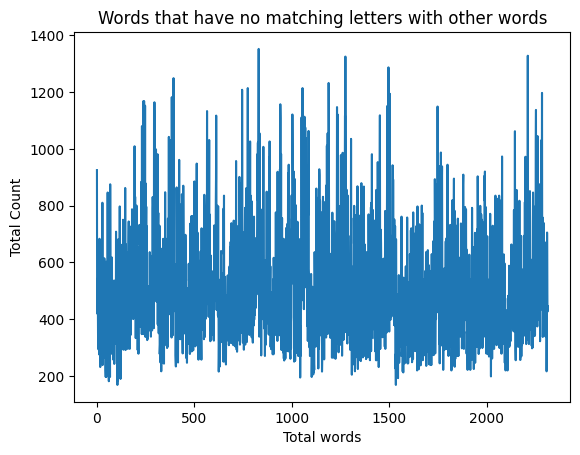

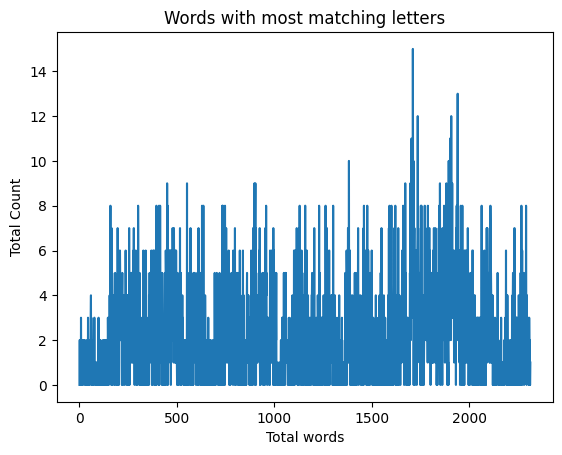

1352
15


In [5]:
zero = []
twos = []
f1 =plt.figure()
f2 =plt.figure()
for word in list_of_words:
    # print(list_of_words)
    result = generateEncoding(word, list_of_words)
    sum_of_zero = np.sum(np.asarray(result) == 0, axis=1)
    sum_of_one = np.sum(np.asarray(result) == 1, axis=1)
    sum_of_two = np.sum(np.asarray(result) == 2, axis=1)
    sum_of_encoding = np.sum(result,axis=1)
    zero.append(np.count_nonzero(sum_of_zero == 5) and np.count_nonzero(sum_of_encoding == 0))
    twos.append(np.count_nonzero(sum_of_encoding == 8) and np.count_nonzero(sum_of_two == 4))

ax1 = f1.add_subplot(111)
ax1.plot(zero)
ax1.set_xlabel('Total words') 
ax1.set_ylabel('Total Count') 
ax1.set_title("Words that have no matching letters with other words")

ax2 = f2.add_subplot(111)
ax2.plot( twos)
ax2.set_xlabel('Total words') 
ax2.set_ylabel('Total Count') 
ax2.set_title('Words with most matching letters')
plt.show()

print(max(zero))
print(max(twos))


In [6]:
def sortFunction(argument):
    newResult = []
    sum_of_encoding = np.sum(argument,axis=1)
    # count_of_one = np.sum(np.asarray(argument) == 1, axis = 1)
    count_of_zeros = np.sum(np.asarray(argument) == 0, axis = 1)
    count_of_two = np.sum(np.asarray(argument) == 2, axis = 1)
    for i in range(len(argument)):
        if(sum_of_encoding[i] <= 7):
            if count_of_zeros[i] <= 2:
                if (count_of_two[i] <= 1):
                    newResult.append(argument[i])
    return newResult

In [7]:
def removeDuplicate(argument):
    res = []
    [res.append(i) for i in argument if i not in res]
    return res

In [8]:
def compareEncodings(result_list, string_list, finalEncoding):
    finalString = []
    for i_word in range(len(finalEncoding)):
        for i in range(len(result_list)):
            if(finalEncoding[i_word] == result_list[i]):
                word = string_list[i]
            else:
                continue
        finalString.append(word)
    return finalString

In [9]:
def printColorMetrix(argument):
    for i in range(len(argument)):
        current_word = argument[i]
        for i_char in current_word:
            if i_char == 0:
                print(black_sq, end='')
            elif i_char == 1:
                print(yellow_sq, end='')
            elif i_char == 2:
                print(green_sq, end='')
        print()

In [10]:
def run(argument):
    single_word = getWord(argument)
    result = generateEncoding(single_word, list_of_words)
    newResult = sortFunction(result)
    newEncoding = removeDuplicate(newResult)[:6]
    finalString = compareEncodings(result, list_of_words, newEncoding)

    # selectRandom(removeDuplicate(newResult))

    for i in range(len(finalString)):
        print (finalString[i])

    printColorMetrix(newEncoding)
    


In [11]:
run(randomWord)


least
amiss
arose
aroma
loser
altar
🟨⬛🟨🟨⬛
🟨⬛⬛🟨🟨
🟨⬛🟩🟨⬛
🟨⬛🟩⬛🟨
🟨🟨🟨⬛⬛
🟨🟨⬛🟩⬛
